# <font color = red> Wrangle and Analyze WeRateDogs Twitter data </font>

_This project is divided into the following sections:_

- _ Data Wrangling_<br>
    - _Gathering_<br>
    - _Assessing_<br>
    - _Cleaning_<br><br>    
    
- _Exploratory Data Analysis with visualizations._

## <font color = blue >Import file  modules</font>

In [1502]:
import pandas as pd
import numpy as np
import tweepy
import logging
import json
import pickle
import requests
from PIL import Image
from io import BytesIO
from numpy import nan
import re
import matplotlib
import matplotlib.pyplot as plt
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from matplotlib.pyplot import figure
import seaborn as sns
from ggplot import *



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## <font color = blue >Data Wrangling</font>

### <font color = green >Gathering</font>

_We will gather the WeRateDogs twitter archive which holds over 5000+ tweets, this will serve as our main dataset for analysis_


In [1503]:
# Read the twitter excel data for 5000 tweets
twitter_excel = pd.read_csv('twitter-archive-enhanced.csv')

In [1504]:
# Check the dataset using head function
twitter_excel.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [1505]:
# View the count of values in each column
twitter_excel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1506]:
# View the range of values in each column
twitter_excel.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1507]:
# View the columns in the dataset
list(twitter_excel)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [1508]:
# Check for duplicated values
twitter_excel[twitter_excel.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1509]:
# View the values in the rating_numerator column
twitter_excel.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [1510]:
# Sort and view the values in the rating_denominator column
twitter_excel.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

Getting JSON data via tweet ID

In [1517]:
tweet_json = []
error_json =[]
for id in twitter_excel['tweet_id']:
    try:
        tweets = api.get_status(id, tweet_mode='extended')
        tweet_id = id
        favorites_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']
        user_favorites = tweets['user']['favourites_count']
        created_datetime = tweets['created_at']
        user_followers = tweets['user']['followers_count']
        tweet_json.append({'tweet_id':int(tweet_id),'favorites_count':int(favorites_count),'retweet_count':int(retweet_count),'user_favorites':int(user_favorites),'user_followers':int(user_followers),'created_datetime':pd.to_datetime(created_datetime)})
    except Exception as e:
        error_json.append(id)
        

In [1518]:
error_json = pd.DataFrame(error_json)
error_json.columns = ['id']
error_json.head()

,id
0,888202515573088257
1,873697596434513921
2,872668790621863937
3,869988702071779329
4,866816280283807744


In [1519]:
error_json_tweetid =[]
for id in error_json['id']:
    try:
        tweets = api.get_status(id, tweet_mode='extended')
        tweet_id = id
        favorites_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count']
        user_favorites = tweets['user']['favourites_count']
        created_datetime = tweets['created_at']
        user_followers = tweets['user']['followers_count']
        tweet_json.append({'tweet_id':int(tweet_id),'favorites_count':int(favorites_count),'retweet_count':int(retweet_count),'user_favorites':int(user_favorites),'user_followers':int(user_followers),'created_datetime':pd.to_datetime(created_datetime)})
    except Exception as e:
        error_json_tweetid.append(id)

In [1520]:
error_json_tweetid

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368]

In [1521]:
# We can read the txt file line by line to a dataframe
tweet_json = pd.DataFrame(tweet_json)
tweet_json.to_csv('tweet_json.txt',encoding='utf-8',index=False)
json_tweet_data = pd.read_csv('tweet_json.txt', encoding='utf-8')
json_tweet_data.head()

,created_datetime,favorites_count,retweet_count,tweet_id,user_favorites,user_followers
0,2017-08-01 16:23:56,38616,8542,892420643555336193,135431,7079294
1,2017-08-01 00:17:27,33102,6280,892177421306343426,135431,7079294
2,2017-07-31 00:18:03,24924,4161,891815181378084864,135431,7079294
3,2017-07-30 15:58:51,42017,8668,891689557279858688,135431,7079294
4,2017-07-29 16:00:24,40162,9419,891327558926688256,135431,7079294


In [1522]:
# We set tweet id to be the index for future merges
json_tweet_data.set_index('tweet_id',inplace=True)

In [1523]:
json_tweet_data

,created_datetime,favorites_count,retweet_count,user_favorites,user_followers
tweet_id,,,,,
892420643555336193,2017-08-01 16:23:56,38616,8542,135431,7079294
892177421306343426,2017-08-01 00:17:27,33102,6280,135431,7079294
891815181378084864,2017-07-31 00:18:03,24924,4161,135431,7079294
891689557279858688,2017-07-30 15:58:51,42017,8668,135431,7079294
891327558926688256,2017-07-29 16:00:24,40162,9419,135431,7079294
891087950875897856,2017-07-29 00:08:17,20142,3118,135431,7079294
890971913173991426,2017-07-28 16:27:12,11805,2075,135431,7079294
890729181411237888,2017-07-28 00:22:40,65247,18925,135431,7079294
890609185150312448,2017-07-27 16:25:51,27675,4273,135431,7079294


In [1524]:
json_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 892420643555336193 to 666020888022790149
Data columns (total 5 columns):
created_datetime    2342 non-null object
favorites_count     2342 non-null int64
retweet_count       2342 non-null int64
user_favorites      2342 non-null int64
user_followers      2342 non-null int64
dtypes: int64(4), object(1)
memory usage: 109.8+ KB


In [1525]:
# Downloading the image file from the url provided
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
with open('image-predictions.tsv','wb') as file_new:
    file_new.write(response.content)
images = pd.read_csv('image-predictions.tsv',sep ='\t',encoding='utf-8')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1526]:
#Checking the counts in each column
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1527]:
#View the data values in the images dataframe
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1528]:
#view the columns in the images dataframe
list(images)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [1529]:
#View the entire dataframe
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1530]:
#Check if the a image tweet id is available in the twitter archive dataset
twitter_excel[twitter_excel['tweet_id'] == 	890729181411237888]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None


In [1531]:
#Checking for duplicates
images[images.duplicated(['tweet_id'],keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [1532]:
#Checking for duplicates
images[images.duplicated(['jpg_url'],keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


We see that there are 132 duplicate values jpg_url column of images dataframe

## <font color = blue >Assessing</font>

_The columns in each table are described in this section. The column description is compared with the table values. Each table is displayed to identify errors in table values by visual assessment._

In [1533]:
# Display the twitter archive data
twitter_excel

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

- Date and time are together under the timestamp variable. Dog names, rating_numerator and rating_denominator need to be checked for accuracy. Index no 2335 has incorrect dog names, rating_numerator and rating_denominator values._

***Description of columns***

- tweet_id : Representation of the unique identifier of the tweet.<br>
- in_reply_status_id: If the tweet is a reply. This column will contain the integer representation of the orginal tweet id.<br>
- in_reply_user_id: This column will contain the integer representation of the orginal tweets author id.
- timestamp: This column contains the date and time of when the tweet was created.<br>
- source: Utility used to posted the tweet on twitter as a HTML-formatted string.<br>
- text: The twitter text posted and saved in an'UTF-8' format.<br>
- retweeted_status_id: This column is valid only the tweet is a retweet by the user. This column contains the integer value of     the orginal tweet id.<br>
- retweeted_status_user_id: This column is valid only the tweet is a retweet by the user. This column contains the integer value of the tweet id of the retweet.<br>
- retweeted_status_timestamp: This column contains the date and time of the retweet.<br>
- expanded_urls: This column contains the url corresponding to the tweet. If the tweet is a retweet, the url be the corresponding retweet url.<br>
- rating_numerator: This column contains the numerator value of the rating. Ideally the rating_numerator value being greater than the rating_denominator will indicate that the dog received a good rating.
- rating_denominator: This column contains the denominator value of the rating. 
- name: This column contains the name of the dog being rated.
- Doggo: This column indicates dogs that are doggos. A dog that either a big old pupper or small woofer is a doggo.
- floofer: This column indicates dogs that are floofers. A big old doogo is called a woofer and a big old woofer is called a floofer.<br>
- pupper: This column indicates dogs that are puppers. A small doggo is called a pupper.<br>
- puppo: This column indicates dogs that are puppos.Puppo is a dog that is between pupper and doggo stages.

In [1534]:
json_tweet_data

,created_datetime,favorites_count,retweet_count,user_favorites,user_followers
tweet_id,,,,,
892420643555336193,2017-08-01 16:23:56,38616,8542,135431,7079294
892177421306343426,2017-08-01 00:17:27,33102,6280,135431,7079294
891815181378084864,2017-07-31 00:18:03,24924,4161,135431,7079294
891689557279858688,2017-07-30 15:58:51,42017,8668,135431,7079294
891327558926688256,2017-07-29 16:00:24,40162,9419,135431,7079294
891087950875897856,2017-07-29 00:08:17,20142,3118,135431,7079294
890971913173991426,2017-07-28 16:27:12,11805,2075,135431,7079294
890729181411237888,2017-07-28 00:22:40,65247,18925,135431,7079294
890609185150312448,2017-07-27 16:25:51,27675,4273,135431,7079294


The date and time values are under one column called created_datetime. This will need to seperated for better examination and analysis of data.

- created_datetime: This column indicates the UTC date and time when the tweet was created.
- favorite_count: This column indicates the number of times this tweet has received a like from twitter users.
- retweet_count: This column indciates the number of times, this tweet was retweeted by other users.
- user_followers: This column indicates the number of followes for the author of the tweet.
- user_favorites: This column indicates the favorites count of the author of the tweet
- tweet_id: Representation of the unique identifier of the tweet.

In [1535]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- tweet_id: Representation of the unique identifier of the tweet.<br>
- jpg_url: This column contains the url for the jpg image associated with the dog in the tweet.<br>
- img_num: This column contains the image number for the tweet. Some tweets have more than one image associated with them and in   most each image represents a unique dog.<br>
- p1: p1 column indicates the first prediction associated with the image. The prediction is then compared with the orginal dog breed in the tweet.<br>
- p1_conf: This column indicates the confidence associated with the prediction in the p1 column.<br>
- p1_dog: This column indictaes if the prediction in p1 is true or false. This boolean value is based on comparsion with the dog breed in the tweet.<br>
- p2: p2 column indicates the second prediction for the image. The prediction is then compared with the orginal dog breed in the tweet.<br>
- p2_conf: This column indicates the confidence associated with the prediction in the p2 column.<br>
- p2_dog: This column indcuates if the prediction in p2 is true or false. The boolean value is based on comparison between p2 and dog breed specified in the tweet.<br>
- p3: p2 column indicates the third prediction for the image. The prediction is then compared with the orginal dog breed in the tweet.<br>
- p3_conf: This column indicates the confidence associated with the prediction in the p3 column.<br>
- p3_dog: This column indicates if the prediction in p3 is true or false. The boolean value is based on comparison between p3 and dog breed specified in the tweet.<br>

In [1536]:
twitter_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1537]:
# Retweets in the twitter_excel file
twitter_excel[twitter_excel['in_reply_to_status_id'] > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


We see that a 78 rows of twitter_excel dataset are replies from the user. This data would be irrelevant to our analysis.

In [1538]:
#count of retweeted data
twitter_excel[twitter_excel['retweeted_status_id'] > 0].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

In [1539]:
# We set the max column width, this should allow us to view all the data in the column
pd.set_option('max_colwidth', 800)

In [1540]:
# We examine the rating_denominator column
twitter_excel[twitter_excel['rating_denominator'] >10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

We see that there are a few rows with rating_denominator greater than 10.

In [1541]:
twitter_excel[twitter_excel['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None


We find that there are a few rows with rating_numerator values less than 10

In [1542]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The datatypes all look to be in order in the dataset.

In [1543]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


We find that some of the predictions in the p1,p2 and p3 columns are obscure. Like the last row of 2074 has dog predictions that are food names and index no 2052 has predictions that are car names.

_***Quality issues*** (accuracy,validity,consistency and completeness)_<br>
Twitter_excel dataset<br>
- timestamp column is an object datatype. Datetime datatype will allow for better analysis.<br>
- Retweet  and reply data is present in the dataset.<br>
- Rating_numerator column has incorrect values.<br>
- Rating_denominator column has incorrect values.<br>
- name column has incorrect values.<br>
- The text data can be used to create a gender column.<br> 
- Dog stages are incorrect for a few rows.<br>
- Create a hashtag column for the hashtag data in text.<br>

json_tweet_data<br>
- created datetime column is an object datatype. Datetime datatype will allow for better analysis.<br>

images<br>
- jpg url column has values that are duplicated.<br>
- Many prediction columns cause difficulty in reading the dataset.<br>
- Some predictions in p1,p2 and p3 columns are obscure. We see values such as food and car names.<br>


_***Tidiness*** (structural issues)_<br>
  Twitter_excel dataset<br>
- Stages of dogs are in different columns. This can be made two columns Dog 1 stage and Dog 2 stage.<br>
- Date and time are both in the timestamp column.

***It is essential to make a copy of the datasets before we begin the cleaning process. This will ensure that the orginal data will be remain unaffected for comparison after cleaning***.

In [1544]:
archive_copy = twitter_excel.copy()
images_copy = images.copy()

## <font color = blue >Cleaning</font>

### <font color = green >Quality issues</font>

_Remove rows that are retweets_

__Define__: The table contains rows that are retweets. For correct analysis the retweet data must be removed. We can do that with the following steps
- Identify rows with a retweet_status_id by filtering for retweet_status_id greater than 10.<br>
- Save these rows to a new dataset.<br>
- Filter the orginal dataset to not include these rows.<br>
- Drop any na values in the tweet_id column


__Code__:

In [1545]:
#Create a new dataframe with only retweet values
i = archive_copy[archive_copy['retweeted_status_id'].notnull()]

In [1546]:
#Examine the dataframe
i

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [1547]:
#Create a datframe without the retweet values
archive_copy = archive_copy[~archive_copy.isin(i)]

In [1548]:
#Drop all na values in tweet_id
archive_copy.dropna(subset=['tweet_id'], how='all', inplace = True)

***Test***:

In [1549]:
#test the dataset
archive_copy[archive_copy['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


_Timestamp column is an object datatype_

***Define***: The Timestamp column is in the object format. It will be more useful to have this column in the datetime object                 format. We can do that the following way
- We can use the pd.to_datetime function on the column and save the changes to the orginal column.

***Code***:

In [1550]:
#Convert the timestamp to datetime object
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp']) 

***Test***:

In [1551]:
#Check the datatypes
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1

_Rating numerator and rating denominator columns have incorrect values_

***Define***: The rating_numerator and rating_denominator columns has values that are incorrect. This was identfied on comparison with the text in the tweet. We can do this the following way
- We identify the type of values in the rating_numerator column.<br>
- we then pull values from the text column using a regex in re.findall function. This should be done after importing the re(regular expression module). if the text contains more than one fracton, then the second fraction is placed in a new column.<br>
- we then save these columns in a new dataframe.<br>
- This dataframe is merged with archive_new dataframe. The values from extracted from the text is compared with the rating_numerator and rating_denominator column.<br>
- Rows that do not match are identified and changes are made to the rating_numerator. The same process is repeated for the rating_denominator column.

***Code***:

In [1552]:
#create a new dataset
archive_new =[]
archive_new = archive_copy

In [1553]:
#Use regex function to extract required rates
rating=[]
for line in archive_new['text']:
    rating.append(re.findall(r"(\d*\.?\d+\/\d*\.?\d+)",line))
    
archive_new['rating_x'] = rating

In [1554]:
#The second fraction is placed in rating_y
archive_new['rating_y'] = archive_new['rating_x'].str[1]

In [1555]:
#The first fraction is placed in rating_x
archive_new['rating_x'] =archive_new['rating_x'].str[0]

In [1556]:
#Obtain numerator values
archive_new['num1_x'] = archive_new['rating_x'].str.split('/').str[0]

In [1557]:
#Obtain denominator values
archive_new['den1_x'] = archive_new['rating_x'].str.split('/').str[1]

In [1558]:
#Obtain numerator values
archive_new['num1_y'] = archive_new['rating_y'].str.split('/').str[0]

In [1559]:
#Obtain denominator values
archive_new['den1_y'] = archive_new['rating_y'].str.split('/').str[1]

In [1560]:
#Convert to numeric
archive_new['rating_numerator'] = pd.to_numeric(archive_new.rating_numerator,errors='coerce')

In [1561]:
#replace all NaN with None
archive_new['rating_numerator'] = archive_new['rating_numerator'].apply(lambda x: None if np.isnan(x) else x)

In [1562]:
#Convert to numeric
archive_new['num1_x'] = pd.to_numeric(archive_new.num1_x,errors='coerce')

In [1563]:
archive_new['num1_y'] = pd.to_numeric(archive_new.num1_y,errors='coerce')

In [1564]:
archive_new['den1_x'] = pd.to_numeric(archive_new.den1_x,errors='coerce')

In [1565]:
archive_new['den1_y'] = pd.to_numeric(archive_new.den1_y,errors='coerce')

In [1566]:
#Identify errors in dataset
archive_err= archive_new[archive_new['rating_numerator']!= archive_new['num1_x']]

In [1567]:
#reset index to the dataset
archive_new = archive_new.reset_index()

In [1568]:
archive_new=archive_new.reset_index()

In [1569]:
archive_new.drop(['index'],axis=1,inplace=True)

In [1570]:
archive_new.rename(columns ={'level_0':'index'})

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,doggo,floofer,pupper,puppo,rating_x,rating_y,num1_x,den1_x,num1_y,den1_y
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,...,None,None,None,None,12/10,NaN,12.0,10,NaN,NaN
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,...,None,None,None,None,12/10,NaN,12.0,10,NaN,NaN
5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
6,6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
8,8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,...,None,None,None,None,13/10,NaN,13.0,10,NaN,NaN
9,9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,...,doggo,None,None,None,14/10,NaN,14.0,10,NaN,NaN


In [1571]:
#Examine the columns
archive_err[['text','rating_numerator','num1_x','num1_y']]

,text,rating_numerator,num1_x,num1_y
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,13.50,NaN
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,9.75,NaN
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,11.27,NaN
805,This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT,10.0,0.10,NaN
988,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,10.0,0.10,NaN
1008,Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr,11.0,0.11,NaN
1009,Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP,10.0,0.10,NaN
1015,"Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7",11.0,0.11,NaN
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,11.0,0.11,NaN
1025,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,9.0,0.90,NaN


In [1572]:
#Make changes to the dataset
archive_new.loc[45,'rating_numerator'] = 13.50
archive_new.loc[695,'rating_numerator'] = 9.75
archive_new.loc[763,'rating_numerator'] = 11.27
archive_new.loc[1689,'rating_numerator'] = 9.50
archive_new.loc[1712,'rating_numerator'] = 11.26
archive_new['rating_denominator'] = archive_new['rating_denominator'].astype(float)

In [1573]:
#Check additional values
archive_col2 = archive_new[archive_new['num1_y']>0]

In [1574]:
archive_col2[['text','rating_numerator','num1_x','num1_y']]

,text,rating_numerator,num1_x,num1_y
52,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,17.0,13.0
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,960.0,13.0
619,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,12.0,11.0
832,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0,7.0
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,9.0,14.0
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,4.0,13.0
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,11.0
1044,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0,8.0
1180,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,9.0,2.0
1280,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,4.0,13.0


In [1575]:
#Make changes to the dataset
archive_new.loc[890,'rating_numerator'] = 14
archive_new.loc[987,'rating_numerator'] = 13
archive_new.loc[1024,'rating_numerator'] = 11
archive_new.loc[1483,'rating_numerator'] = 10
archive_new.loc[2154,'rating_numerator'] = 9

In [1576]:
#Convert to numeric and check for errors
archive_new['rating_denominator'] = pd.to_numeric(archive_new.rating_denominator, errors='coerce')
archive_derr = archive_new[archive_new['rating_denominator']!=archive_new['den1_y']]
archive_derr = archive_derr[archive_derr['rating_numerator']!=archive_derr['den1_x']]

In [1577]:
archive_derr[['text', 'rating_denominator', 'den1_x','den1_y']]

,text,rating_denominator,den1_x,den1_y
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10.0,10,NaN
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10.0,10,NaN
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10.0,10,NaN
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10.0,10,NaN
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10.0,10,NaN
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,10.0,10,NaN
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,10.0,10,NaN
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,10.0,10,NaN
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,10.0,10,NaN
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,10.0,10,NaN


The following are the changes that need to be made after examining 27 rows<br>
row 429 has a rating_denominator of None<br>
row 890 has a rating_denominator of 10<br>
row 987 has a rating_denominator of 10<br>
row 1483 has a rating_denominator of 10<br>
row 2154 has a rating_denominator of 10<br>
row 2170 has a rating_denominator of 10<br>

In [1578]:
#Create appropriate columns for comparison
archive_new['zero']=.0
archive_new['den'] = archive_new['zero']+archive_new['den1_x']
archive_den2y = archive_new[archive_new['den1_y']>1]

In [1579]:
#Examine the dataset
archive_den2y[['text', 'rating_denominator', 'den1_x','den1_y']]

,text,rating_denominator,den1_x,den1_y
52,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,10.0,10,10.0
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0.0,0,10.0
619,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10.0,10,10.0
832,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10,10.0
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,11,10.0
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,20,10.0
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,10.0
1044,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10,10.0
1180,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,10.0,10,10.0
1280,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",10.0,10,10.0


In [1580]:
#Make the changes
archive_new.loc[263,'rating_denominator'] = 10
archive_new.loc[2154,'rating_denominator'] = 10
archive_new.loc[890,'rating_denominator'] = 10
archive_new.loc[987,'rating_denominator'] = 10
archive_new.loc[1024,'rating_denominator'] = 10
archive_new.loc[1483,'rating_denominator'] = 10


In [1581]:
#Drop unecessary columns
archive_new.drop(['rating_x','rating_y','num1_x','num1_y','den1_x','den1_y','zero','den'], axis=1,inplace=True)

In [1582]:
archive_new

,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None
6,6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,None,None,None
7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None
8,8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,None,None,None,None
9,9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51,"<a href=""htt

Fix incorrect values in dog names column

***Define***: The incorrect values in the dog names column will identified using the text column. They can be fixed by the following steps
- Examine the text data and identify patterns.
- Use re.findall and regex to identify and append the required part of the text.
- Split the columns to obtain the names
- Merge the dataframes and combine the values into one column.
- Correct all identifable mistakes such as none, quite, a, an in the names column.
- Append the new dataframe to the original dataframe
- Create a dataframe with non null values and compare the two columns
- Identify and replace errors with correct values

***Code***:

In [1583]:
#Get required content from text column
archive_names=[]
archive_d=[]
archive_s =[]
for line in archive_new['text']:
    archive_names.append((re.findall('This is \w*',line)))
    archive_d.append((re.findall('Meet \w*',line)))
    archive_s.append((re.findall('Say hello to \w*',line)))

In [1584]:
#Convert to dataframe
archive_names =pd.DataFrame(archive_names)

In [1585]:
#Name the columns
archive_names.columns=['name','additional']

In [1586]:
#Convert to dataframe and name the columns
archive_d=pd.DataFrame(archive_d)
archive_d.columns=['name']



In [1587]:
#Create a dataframe and split the content to get only dog names
archive_s=pd.DataFrame(archive_s)
archive_s.columns=['only']
archive_s['split'] = archive_s['only'].str.split()
archive_s['onlyname'] = archive_s['split'].str[3]
archive_s = archive_s.drop(['only','split'], axis=1)
archive_s

,onlyname
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [1588]:
#Replacing content that do not have dog names
archive_names['name'] = archive_names['name'].replace(['This is an'],None)

In [1589]:
#Reset index to the dataframe
archive_s  = archive_s.reset_index()

In [1590]:
#create new columns to get dog names
archive_names['split'] = archive_names['name'].str.split()

In [1591]:
archive_names['name_dog'] = archive_names['split'].str[2]

In [1592]:
#Examine the dataframe content
archive_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 4 columns):
name          1170 non-null object
additional    4 non-null object
split         1170 non-null object
name_dog      1170 non-null object
dtypes: object(4)
memory usage: 68.0+ KB


In [1593]:
#Examine the dataframe
archive_names

,name,additional,split,name_dog
0,This is Phineas,None,"[This, is, Phineas]",Phineas
1,This is Tilly,None,"[This, is, Tilly]",Tilly
2,This is Archie,None,"[This, is, Archie]",Archie
3,This is Darla,None,"[This, is, Darla]",Darla
4,This is Franklin,None,"[This, is, Franklin]",Franklin
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,This is Zoey,None,"[This, is, Zoey]",Zoey
9,This is Cassie,None,"[This, is, Cassie]",Cassie


In [1594]:
#Drop additional columns
archive_names = archive_names.drop(['name','additional','split'], axis=1)

In [1595]:
#Examine the dataframe
archive_names

,name_dog
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin
5,None
6,None
7,None
8,Zoey
9,Cassie


In [1596]:
#plit columns to get dog names
archive_d['split'] = archive_d['name'].str.split()
archive_d['nameonly'] = archive_d['name'].str.split().str[1]

In [1597]:
#Drop additional columns
archive_d = archive_d.drop(['name','split'], axis=1)

In [1598]:
#Reset index to the dataframe
archive_d = archive_d.reset_index()

In [1599]:
#Reset index to the dataframe
archive_names = archive_names.reset_index()

In [1600]:
#Merge the dataframe
archive_names=pd.merge(archive_names,archive_d,on=['index'], how='inner')

In [1601]:
#Replace null values in name_dog with nameonly values
archive_names['name_dog'] = archive_names['name_dog'].where(~pd.isnull(archive_names['name_dog']),archive_names['nameonly'])

In [1602]:
#Drop additional columns
archive_names.drop(['nameonly'], axis=1, inplace=True)

In [1603]:
#Examine the dataset
archive_names

,index,name_dog
0,0,Phineas
1,1,Tilly
2,2,Archie
3,3,Darla
4,4,Franklin
5,5,None
6,6,Jax
7,7,None
8,8,Zoey
9,9,Cassie


In [1604]:
#Merge the dataset
archive_names=pd.merge(archive_names,archive_s,on=['index'], how='inner')

In [1605]:
#Replace null values with correct values in onlyname column
archive_names['name_dog'] = archive_names['name_dog'].where(~pd.isnull(archive_names['name_dog']),archive_names['onlyname'])

In [1606]:
#Drop excess column
archive_names.drop(['onlyname'], axis=1, inplace=True)

In [1607]:
archive_new = archive_new.reset_index()

In [1608]:
#Merge dataframe to archive_new
archive_new = pd.merge(archive_new, archive_names,on='index', how='inner')


In [1609]:
#View the columns in archive_new
list(archive_new)

['index',
 'level_0',
 'tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'name_dog']

In [1610]:
#Examine the necessary columns
archive_new[['text','name','name_dog']]

,text,name,name_dog
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,Cassie


In [1611]:
# Replace the with none
archive_new['name'] = archive_new['name'].str.replace("the","None")

In [1612]:
#Examine the necessary columns
archive_new[['text','name','name_dog']]

,text,name,name_dog
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,Cassie


In [1613]:
#Create a new dataframe of only errors in name
archive_dog = archive_new[archive_new['name']!=archive_new['name_dog']]

In [1614]:
#Examine the dataframe
archive_dog


,index,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
5,5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None,None
7,7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None,None
12,12,12,8.896654e+17,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10.0,None,None,None,None,puppo,None
23,23,23,8.873432e+17,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13.0,10.0,None,None,None,None,None,None
24,24,24,8.871014e+17,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,None,None,None,None,None,None
29,29,29,8.862670e+17,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None,None
33,33,33,8.855190e+17,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10.0,None,None,None,None,None,None
34,34,34,8.851676e+17,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13.0,10.0,None,None,None,None,None,None
38,38,38,8.844418e+17,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14.0,10.0,None,None,None,None,None,None
39,39,39,8.842479e+17,NaN,NaN,2017-07-10 

In [1615]:
#Replace a with none
archive_dog.name.replace('a', None, inplace=True)

In [1616]:
#Replace an with none
archive_dog.name.replace('an', None, inplace=True)

In [1617]:
#create a dataframe with only the null values in name_dog
archive_dog_n = archive_dog[archive_dog['name_dog'].isnull()]

In [1618]:
#Examine the new dataframe
archive_dog_n

,index,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
5,5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None,None
7,7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None,None
12,12,12,8.896654e+17,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10.0,None,None,None,None,puppo,None
23,23,23,8.873432e+17,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13.0,10.0,None,None,None,None,None,None
24,24,24,8.871014e+17,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,None,None,None,None,None,None
29,29,29,8.862670e+17,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None,None
33,33,33,8.855190e+17,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10.0,None,None,None,None,None,None
34,34,34,8.851676e+17,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13.0,10.0,None,None,None,None,None,None
38,38,38,8.844418e+17,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14.0,10.0,None,None,None,None,None,None
39,39,39,8.842479e+17,NaN,NaN,2017-07-10 

In [1619]:
#Create a new dataframe with none values in the name column
archive_delete = archive_dog_n[archive_dog_n['name'] == "None"]

In [1620]:
# Examine the non none values in name and name_dog
for id in archive_delete['tweet_id']:
    archive_dog[archive_dog['tweet_id'] !=id]

In [1621]:
#Create a dataframe with only non null values in name and name_dog columns
archive_delete = archive_dog[~archive_dog['tweet_id'].isin(archive_delete['tweet_id'])]

In [1622]:
#Examine the necessary columns
archive_delete[['text','name','name_dog']]

,text,name,name_dog
406,Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81,Atlas,None
665,Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy https://t.co/mADHGenzFS,Carbon,his
848,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,None,Shiloh
982,This is Luther. He saw a ghost. Spooked af. 11/10 hang in there pupper https://t.co/EdKG43VvEl,LuNoner,Luther
1183,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,None,a
1348,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,None,the
1424,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,None,the
1463,Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C,Lupe,how
1618,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,None,the
1636,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,None,the


The following are the changes that need to be made

row982 has a name of Luther

We can make the change below. All other changes to the name column have already been made.


In [1623]:
#Make the changes to the original dataframe
archive_new.loc[982,'name'] ="Luther"
archive_new.name.replace('a', None, inplace=True)
archive_new.name.replace('an', None, inplace=True)
archive_new.name.replace('quite', None, inplace=True)
archive_new.name.replace('such', None, inplace=True)

In [1624]:
#Test the changes
archive_new[archive_new['index']==982]

,index,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
982,982,982,7.240046e+17,NaN,NaN,2016-04-23 22:38:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Luther. He saw a ghost. Spooked af. 11/10 hang in there pupper https://t.co/EdKG43VvEl,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/724004602748780546/photo/1,https://twitter.com/dog_rates/status/724004602748780546/photo/1,https://twitter.com/dog_rates/status/724004602748780546/photo/1",11.0,10.0,Luther,None,None,pupper,None,Luther


In [1625]:
#Examine the dataframe
archive_new

,index,level_0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
0,0,0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,Phineas
1,1,1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,Tilly
2,2,2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,Archie
3,3,3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,Darla
4,4,4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,Franklin
5,5,5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None,None
6,6,6,8.909719e+17,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,None,None,None,Jax
7,7,7,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None,None
8,8,8,8.906092e+17,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Z

Remove all rows that are replies from the orginal user

***Define***: The orginal datasety has rows that are replies from the user. These rows can be removed as we focus on studying the orginal tweet.

***Code***

In [1626]:
#Identify the values in the reply to user id column
archive_new['in_reply_to_user_id'].value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [1627]:
#Drop the two reply columns
archive_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [1628]:
#Test the changes
archive_new[archive_new['tweet_id'] ==886267009285017600]

,index,level_0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,name_dog
29,29,29,8.862670e+17,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12.0,10.0,None,None,None,None,None,None


In [1629]:
#Drop other unecessary columns
archive_new.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','name_dog'], axis=1, inplace=True)

***Test***

In [1630]:
#Test the changes
archive_new

,index,level_0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,1,1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,2,2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,3,3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,4,4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
5,5,5,8.910880e+17,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None
6,6,6,8.909719e+17,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,None,None,None
7,7,7,8.907292e+17,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None
8,8,8,8.906092e+17,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,None,None,None,None
9,9,9,8.902403e+17,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240

Create a column for the hashtag data

***Define***: The hashtag data is present with orginal text. It will be interesting to create a new column for the hashtag data.
- Extract the hashtag data from the text column. This can be done by regex and all hashtags are easy to identify with # as th starting function

***Code***:

In [1631]:
#Use the regex function to extract the hashtag values from the text column
archive_new['hashtag'] = archive_new['text'].str.extract(r"#(\w+)", expand=True)


***Test***:

In [1632]:
#Test the changes by examining the value counts
archive_new['hashtag'].value_counts()

BarkWeek                 9
PrideMonth               3
ScienceMarch             1
PrideMonthPuppo          1
Canada150                1
FinalFur                 1
dogsatpollingstations    1
WomensMarch              1
K9VeteransDay            1
BellLetsTalk             1
WKCDogShow               1
notallpuppers            1
ImWithThor               1
NoDaysOff                1
Name: hashtag, dtype: int64

The text data can be parsed to get the gender value for the dog. The gender values can then be placed in the gender column.

***Define***: The gender column can be created to indicate the gender of the dog. This data will be useful for analysis of the gender data by month. 

***Code***:

In [1633]:
#Create a new dataframe
archive_g =archive_new
archive_g=pd.DataFrame(archive_g)

In [1634]:
#Split the text and attach a tag for each word using pos_tag
archive_g['text_split']=archive_g['text'].str.split()
tagger = lambda x: pos_tag(x)
archive_g['tagged'] = archive_g['text_split'].apply(tagger)

In [1635]:
#if the word class is PRP we add it to the pronouner list
pronouner = lambda x: [word for word, pos in x if pos == 'PRP']

#We apply pronouner to already tagged list of words
archive_g['pronouns'] = archive_g['tagged'].apply(pronouner)

#convert the words to lower case
lowerer = lambda x: [a.lower() for a in x]

# we apply lowerer to the words in pronouns column
archive_g['pronouns'] = archive_g['pronouns'].apply(lowerer)
archive_g['pronouns'].head(10)

0                    []
1                    []
2             [he, you]
3             [she, us]
4    [he, you, him, he]
5                  [we]
6              [he, he]
7      [you, they, you]
8                 [she]
9                 [she]
Name: pronouns, dtype: object

In [1636]:
# We create a new dataframe
gender = []

#We create a list of words to search
male = ['he', 'him', 'his', "he's", 'himself']
female = ['she', 'her', 'hers', 'herself', "she's"]

#create a function to obtain the words in the list above for each tweet
def genderer(row):
    #Convert the text column to lower
    row['text'] = row['text'].islower()
    
    #if any pronouns match with the female list we will append it to a dataframe
    if len(row['pronouns']) > 0 and any(i in female for i in row['pronouns']):
        gender.append('Female')
        
    #if any pronouns match with the male list we will append it to a dataframe   
    elif len(row['pronouns']) > 0 and any(i in male for i in row['pronouns']):
        gender.append('Male') 
        
    #append if girl in text
    elif 'girl' in str(row['text']):
        gender.append('Female')   
        
    #append in male in text
    elif 'boy' in str(row['text']):
        gender.append('Male')
    #append netural to the gender dataset   
    else:
        gender.append('Neutral')
        
# apply the genderer function and examine value counts        
archive_g.apply(genderer, axis=1)
archive_g['gender'] = gender
archive_g['gender'].value_counts()

Neutral    1438
Male        554
Female      183
Name: gender, dtype: int64

In [1637]:
#Examine the required columns
archive_app = archive_g[['tweet_id','gender']]

In [1638]:
#Merge to the orginal dataset
archive_new = pd.merge(archive_new,archive_app,on='tweet_id',how='inner')

In [1639]:
#Examine the columns in the orginal dataset
list(archive_new)

['index',
 'level_0',
 'tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'hashtag',
 'text_split',
 'tagged',
 'pronouns',
 'gender_x',
 'gender_y']

Combining data values in p1, p2 and p3 to create a column for dog breed

***Define***: We can combine the breed values in p1, p2 and p3 to create a new column for dog breed. This can be done by analysing the predictions to see if a breed value is correct and we will retain the correct breed values.

- The p1_dog, p2_dog, p3_dog are examined to identify the true values.
- The p1, p2 ,p3 values are appended to a new dataset if the corresponding p1_dog,p2_dog and p3_dog values are true.
- 'None' value is appended if all three predictions are false


***Code***

In [1640]:
#Append the correct dog breeds based on true values in p1_dog,p2_dog and p3_dog columns
breed=[]
confidence=[]
def breedconf(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] ==True:
        breed.append(row['p2'])
        confidence.append(row['p1_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p1_conf'])
    else:
        breed.append('None')
        confidence.append(0)
images.apply(breedconf, axis=1)
    
images['breed'] = breed
images['confidence'] = confidence

In [1641]:
# Drop excess columns
images.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num'], axis=1, inplace=True)

In [1642]:
#Examine the dataset
images

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,None,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.962465
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493


### <font color = green >Tidiness issues</font>

twitter_excel dataset

The date and time values are present in the timestamp column.


***Define***: The date and time values are present in the timestamp column. These values will be more beneficial if they are seperated.
- Obtain date and time columns by applying pt.date and pt.time values on the timestamp column

***Code***

In [1643]:
#Create a new dataframe
archive_fix = archive_new

In [1644]:
#Create date and time columns
archive_fix['date'] = archive_fix['timestamp'].dt.date
archive_fix['time'] = archive_fix['timestamp'].dt.time

In [1645]:
#Make changes to the orginal
archive_new=archive_fix

In [1646]:
#Drop unecessary timestamp column
archive_new.drop(['timestamp'],axis=1,inplace=True)

***Test***

In [1647]:
#Test the changes
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
index                 2175 non-null int64
level_0               2175 non-null int64
tweet_id              2175 non-null float64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
hashtag               24 non-null object
text_split            2175 non-null object
tagged                2175 non-null object
pronouns              2175 non-null object
gender_x              2175 non-null object
gender_y              2175 non-null object
date                  2175 non-null object
time                  2175 non-nul

_The dog stages are in four different columns_

***Define***: The dog stages are in four different columns. The data will be much clearer if the dog stage is in one column.
- We can specify strings with the dog type.
- If the word in the string matches any word in the text. We can append the word to the a dataframe.
- This dataframe can then be added as a new column

***Code***

In [1648]:
#Create string of dog type 
dog_type=[]

string_in = ['doggo','floof','pupper','puppo']
string_out= ['doggo','floofer','pupper','puppo']

#create a for loop to identify dog types from text
for row in archive_new['text']:
    row=row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')
            
archive_new['dog_type'] = dog_type
archive_new['dog_type'].value_counts()

None       1763
pupper      249
doggo        95
floofer      37
puppo        31
Name: dog_type, dtype: int64

***Test***

In [1649]:
#test the changes
archive_new.head()

,index,level_0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,puppo,hashtag,text_split,tagged,pronouns,gender_x,gender_y,date,time,dog_type
0,0,0,8.924206e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,...,None,NaN,"[This, is, Phineas., He's, a, mystical, boy., Only, ever, appears, in, the, hole, of, a, donut., 13/10, https://t.co/MgUWQ76dJU]","[(This, DT), (is, VBZ), (Phineas., NNP), (He's, NNP), (a, DT), (mystical, JJ), (boy., NN), (Only, RB), (ever, RB), (appears, VBZ), (in, IN), (the, DT), (hole, NN), (of, IN), (a, DT), (donut., NN), (13/10, CD), (https://t.co/MgUWQ76dJU, NN)]",[],Neutral,Neutral,2017-08-01,16:23:56,None
1,1,1,8.921774e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,...,None,NaN,"[This, is, Tilly., She's, just, checking, pup, on, you., Hopes, you're, doing, ok., If, not,, she's, available, for, pats,, snugs,, boops,, the, whole, bit., 13/10, https://t.co/0Xxu71qeIV]","[(This, DT), (is, VBZ), (Tilly., NNP), (She's, NNP), (just, RB), (checking, VBG), (pup, NN), (on, IN), (you., NN), (Hopes, NNP), (you're, NN), (doing, VBG), (ok., JJ), (If, IN), (not,, JJ), (she's, NN), (available, JJ), (for, IN), (pats,, NN), (snugs,, NN), (boops,, IN), (the, DT), (whole, JJ), (bit., NN), (13/10, CD), (https://t.co/0Xxu71qeIV, NN)]",[],Neutral,Neutral,2017-08-01,00:17:27,None
2,2,2,8.918152e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,...,None,NaN,"[This, is, Archie., He, is, a, rare, Norwegian, Pouncing, Corgo., Lives, in, the, tall, grass., You, never, know, when, one, may, strike., 12/10, https://t.co/wUnZnhtVJB]","[(This, DT), (is, VBZ), (Archie., NNP), (He, PRP), (is, VBZ), (a, DT), (rare, JJ), (Norwegian, JJ), (Pouncing, VBG), (Corgo., NNP), (Lives, VBZ), (in, IN), (the, DT), (tall, JJ), (grass., NN), (You, PRP), (never, RB), (know, VBP), (when, WRB), (one, CD), (may, MD), (strike., VB), (12/10, CD), (https://t.co/wUnZnhtVJB, NN)]","[he, you]",Male,Male,2017-07-31,00:18:03,None
3,3,3,8.916896e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,...,None,NaN,"[This, is, Darla., She, commenced, a, snooze, mid, meal., 13/10, happens, to, the, best, of, us, https://t.co/tD36da7qLQ]","[(This, DT), (is, VBZ), (Darla., NNP), (She, PRP), (commenced, VBD), (a, DT), (snooze, NN), (mid, NN), (meal., VBD), (13/10, CD), (happens, NNS), (to, TO), (the, DT), (best, JJS), (of, IN), (us, PRP), (https://t.co/tD36da7qLQ, VBP)]","[she, us]",Female,Female,2017-07-30,15:58:51,None
4,4,4,8.913276e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,...,None,BarkWeek,"[This, is, Franklin., He, would, like, you, to, stop, ca

Data available in three different datasets are better viewed in one dataset.

***Define***:  The data in three different datasets can be combined into the archive_new dataset using the merge function. The common column in the three datasets is the tweet_id column, this can be used for the merge

***Code***:

In [1650]:
#Create a new dataset and set index
archive_merge =archive_new
images.set_index('tweet_id',inplace=True)
archive_merge.set_index('tweet_id',inplace=True)

In [1651]:
#Merge the image dataset to the new dataset
archive_merge= pd.merge(left = archive_merge,right = images, left_index=True,right_index=True, how='left')

In [1652]:
archive_merge=pd.DataFrame(archive_merge)

In [1653]:
#Merge the json_tweet_data to the new dataset
archive_merge = pd.merge(left = archive_merge, right= json_tweet_data, left_index=True ,right_index=True, how='left')

In [1654]:
archive_final = archive_merge

In [1655]:
#Examine the columns in the dataset
list(archive_final)

['index',
 'level_0',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'hashtag',
 'text_split',
 'tagged',
 'pronouns',
 'gender_x',
 'gender_y',
 'date',
 'time',
 'dog_type',
 'jpg_url',
 'breed',
 'confidence',
 'created_datetime',
 'favorites_count',
 'retweet_count',
 'user_favorites',
 'user_followers']

In [1656]:
#Drop all unecessary columns
archive_final.drop(['text_split','pronouns','tagged','doggo','floofer','pupper','puppo'], axis=1, inplace=True)

***Test***

In [1657]:
#Test the changes
archive_final.head()

,index,level_0,source,text,expanded_urls,rating_numerator,rating_denominator,name,hashtag,gender_x,...,time,dog_type,jpg_url,breed,confidence,created_datetime,favorites_count,retweet_count,user_favorites,user_followers
tweet_id,,,,,,,,,,,,,,,,,,,,,
8.924206e+17,0,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,Neutral,...,16:23:56,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.921774e+17,1,1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,Neutral,...,00:17:27,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.918152e+17,2,2,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,Male,...,00:18:03,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017-07-31 00:18:03,24924.0,4161.0,135431.0,7079294.0
8.916896e+17,3,3,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,Female,...,15:58:51,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.170278,2017-07-30 15:58:51,42017.0,8668.0,135431.0,7079294.0
8.913276e+17,4,4,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,BarkWeek,Male,...,16:00:24,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017-07-29 16:00:24,40162.0,9419.0,135431.0,7079294.0


In [1658]:
#Save the changes to the csv file - twitter_archive_master.csv
archive_final.to_csv('twitter_archive_master.csv',encoding='utf-8', index=False)

## <font color = blue >Analysis and Visualization</font>

In [1659]:
#Read the master dataset
twitter_master = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [1660]:
#Examine the dataset
twitter_master.head()

,index,level_0,source,text,expanded_urls,rating_numerator,rating_denominator,name,hashtag,gender_x,...,time,dog_type,jpg_url,breed,confidence,created_datetime,favorites_count,retweet_count,user_favorites,user_followers
0,0,0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,Neutral,...,16:23:56,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,Neutral,...,00:17:27,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,Male,...,00:18:03,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017-07-31 00:18:03,24924.0,4161.0,135431.0,7079294.0
3,3,3,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,Female,...,15:58:51,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.170278,2017-07-30 15:58:51,42017.0,8668.0,135431.0,7079294.0
4,4,4,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,BarkWeek,Male,...,16:00:24,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017-07-29 16:00:24,40162.0,9419.0,135431.0,7079294.0


In [1661]:
#Examine the columns in the dataset
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
index                 2175 non-null int64
level_0               2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
hashtag               24 non-null object
gender_x              2175 non-null object
gender_y              2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dog_type              2175 non-null object
jpg_url               1300 non-null object
breed                 1300 non-null object
confidence            1300 non-null float64
created_datetime      1419 non-null object
favorites_count       1419 non-null float64
retweet_count         1419 non-null float64
user_favorites        1419 non-n

In [1662]:
# Convert date and time to the correct format
twitter_master['date'] = pd.to_datetime(twitter_master['date'],errors='coerce')

In [1663]:
twitter_master['time'] = pd.to_datetime(twitter_master['time'],errors='coerce')

Text(0,0.5,'Number of dogs/Frequency')

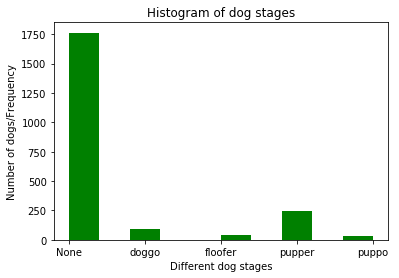

In [1664]:
# Histogram of the dog stages
plt.hist(twitter_master['dog_type'],color='green')
plt.title('Histogram of dog stages')
plt.xlabel('Different dog stages')
plt.ylabel('Number of dogs/Frequency')

The histogram above shows the comparison of the different dog stages in the dataset. We see that majority of the dog stages are unidentifiable from the image. Of the remaining dog tweets, we get that most dogs were identfied to be a pupper. Dogs with doggo stage are identified to be the third highest.

In [1665]:
#creating a copy of the orginal dataset as we look to add additional columns
twitter_new = twitter_master.copy()

In [1666]:
# creating and extracting the year and month from date column
twitter_new['year'] = twitter_new['date'].dt.year
twitter_new['month'] = twitter_new['date'].dt.month

In [1667]:
#creating a new column showing the month & year of when the tweet was created
twitter_new['month_year'] = twitter_new['year'].astype(str) +'-' +twitter_new['month'].astype(str)

In [1668]:
#Converting to the new column to datetime format and setting the column as the index
twitter_new['month_year']  = pd.to_datetime(twitter_new['month_year'])
twitter_new.set_index('month_year',inplace=True)

In [1669]:
#Creating a new dataset with values grouped by month_year column
twitter_groupby = twitter_new.groupby(['month_year']).count()

In [1670]:
# View the dataset
twitter_groupby

,index,level_0,source,text,expanded_urls,rating_numerator,rating_denominator,name,hashtag,gender_x,...,jpg_url,breed,confidence,created_datetime,favorites_count,retweet_count,user_favorites,user_followers,year,month
month_year,,,,,,,,,,,,,,,,,,,,,
2015-11-01,300,300,300,300,297,300,300,300,1,300,...,213,213,213,215,215,215,215,215,300,300
2015-12-01,388,388,388,388,379,388,388,388,0,388,...,236,236,236,251,251,251,251,251,388,388
2016-01-01,194,194,194,194,186,194,194,194,1,194,...,108,108,108,122,122,122,122,122,194,194
2016-02-01,125,125,125,125,123,125,125,125,0,125,...,79,79,79,89,89,89,89,89,125,125
2016-03-01,136,136,136,136,134,136,136,136,0,136,...,74,74,74,85,85,85,85,85,136,136
2016-04-01,60,60,60,60,60,60,60,60,1,60,...,39,39,39,41,41,41,41,41,60,60
2016-05-01,60,60,60,60,60,60,60,60,0,60,...,38,38,38,41,41,41,41,41,60,60
2016-06-01,94,94,94,94,92,94,94,94,2,94,...,52,52,52,61,61,61,61,61,94,94
2016-07-01,97,97,97,97,96,97,97,97,1,97,...,66,66,66,74,74,74,74,74,97,97


Text(0,0.5,'Count')

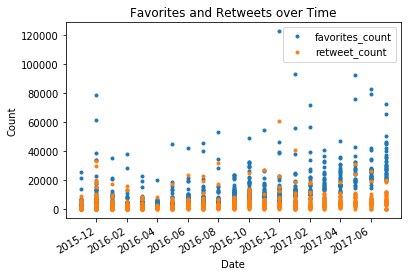

In [1671]:
# Creating a scatter plot showing the favorites count and retweet count over different months
twitter_new[['favorites_count', 'retweet_count']].plot(style = '.')
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

We see above the count of retweets and favorites over months. We can see that there is an increase in the number of favorites from feburary 2017. The retweet count is shown to be almost consistent over the months plotted. We can look at the top two tweets with the highest favorites count below.

In [1672]:
#Check the data
twitter_new[twitter_new['favorites_count'] > 93000]

,index,level_0,source,text,expanded_urls,rating_numerator,rating_denominator,name,hashtag,gender_x,...,jpg_url,breed,confidence,created_datetime,favorites_count,retweet_count,user_favorites,user_followers,year,month
month_year,,,,,,,,,,,,,,,,,,,,,
2017-01-01,374,374,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14.0,10.0,Bo,NaN,Male,...,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,2017-01-11 02:15:36,93308.0,40837.0,135431.0,7079301.0,2017,1
2016-12-01,445,445,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,NaN,Male,...,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370,2016-12-09 06:17:20,122441.0,60735.0,135431.0,7079303.0,2016,12


Text(0,0.5,'No of tweets')

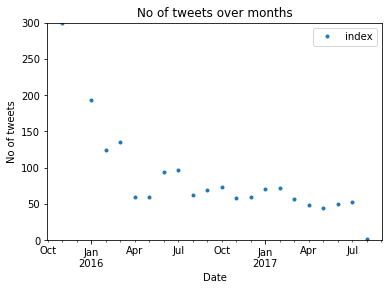

In [1673]:
#scatter plot of the tweets per month
twitter_groupby.plot(y ='index',ylim=[0,300], style = '.')
plt.title('No of tweets over months')
plt.xlabel('Date')
plt.ylabel('No of tweets')

We can see how the tweet count varied over the months. The early months of 2016 have the highest tweet counts. But we can see that the tweet count has steadily decreased over the years. currently we are almost at the lowest point interms of tweet counts.

In [1674]:
#We can look at how the data is divided in the rating_numerator column
twitter_new['rating_numerator'].value_counts()

12.00      499
10.00      441
11.00      426
13.00      307
9.00       156
8.00        98
7.00        53
14.00       44
5.00        36
6.00        32
3.00        19
4.00        16
2.00         9
1.00         7
420.00       2
0.00         2
84.00        1
24.00        1
17.00        1
27.00        1
960.00       1
15.00        1
13.50        1
143.00       1
80.00        1
99.00        1
121.00       1
182.00       1
165.00       1
45.00        1
204.00       1
75.00        1
9.75         1
666.00       1
1776.00      1
11.27        1
11.26        1
9.50         1
88.00        1
144.00       1
26.00        1
20.00        1
44.00        1
60.00        1
Name: rating_numerator, dtype: int64

Text(0,0.5,'rating')

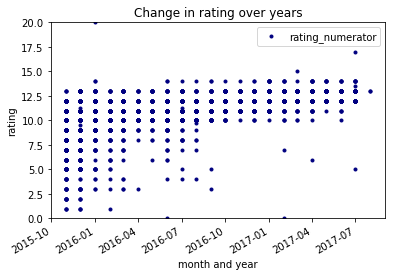

In [1675]:
#We can look at how the ratings have changed over the months since the we rate dogs creation
twitter_new.plot(y='rating_numerator',ylim=(0,20),style='.', colormap='jet')
plt.title('Change in rating over years')
plt.xlabel('month and year')
plt.ylabel('rating')

In [1676]:
# we will remove month_year as the index
twitter_new = twitter_new.reset_index()

In [1677]:
# We will focus on ratings less 21 as majority of the ratings fall under 21
twitter_gg = twitter_new[twitter_new['rating_numerator'] < 21]

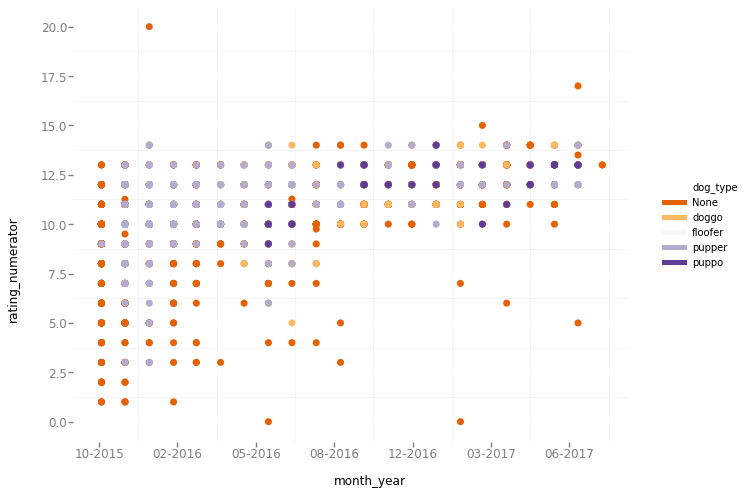

<ggplot: (-9223371873263950378)>

In [1678]:
# scatter plot showing the ratings change over the years and also how different dog types are rated
ggplot(aes(x='month_year', y='rating_numerator', color='dog_type'), data=twitter_gg) +\
geom_point(size=50) +\
scale_x_date(labels='%m-%Y') +\
scale_color_brewer(type='diverging', palette=4) +\
theme_bw()

We can see from the above how the rating varies across months. We can also see how the ratings for different dog types. We see that most of the dog types were none in the period of 10-2015. We also see that from the period of 08-2016 to 06-2017 there is an increase in the ratings. We can also see that most puppo's have a higher rating with the minimum being 8.75. We also see that very few doggos have low ratings

In [1679]:
twitter_gg[twitter_gg['dog_type'] == 'floofer']

,month_year,index,level_0,source,text,expanded_urls,rating_numerator,rating_denominator,name,hashtag,...,jpg_url,breed,confidence,created_datetime,favorites_count,retweet_count,user_favorites,user_followers,year,month
24,2017-07-01,24,24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,None,NaN,...,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,Samoyed,0.733942,2017-07-18 00:07:08,30421.0,5972.0,135431.0,7079294.0,2017,7
43,2017-07-01,43,43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13.0,10.0,Grizzwald,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7
50,2017-07-01,50,50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,https://twitter.com/dog_rates/status/881906580714921986/photo/1,12.0,10.0,Rey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7
479,2016-11-01,479,479,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12.0,10.0,Doc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,11
500,2016-11-01,500,500,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,https://twitter.com/dog_rates/status/796080075804475393/photo/1,12.0,10.0,Yogi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,11
506,2016-11-01,506,506,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU,https://twitter.com/dog_rates/status/794332329137291264/photo/1,12.0,10.0,Nimbus,NaN,...,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,Samoyed,0.988307,2016-11-04 00:15:59,10414.0,2968.0,135431.0,7079304.0,2016,11
600,2016-09-01,600,600,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,https://twitter.com/dog_rates/status/780543529827336192/photo/1,12.0,10.0,None,NaN,...,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,golden_retriever,0.628312,2016-09-26 23:04:13,6831.0,1937.0,135431.0,7079305.0,2016,9
602,2016-09-01,602,602,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Urban Floof Giraffe. I can't handle this. 11/10 https://t.co/zHIqpM5Gni,https://twitter.com/dog_rates/status/780192070812196864/photo/1,11.0,10.0,None,NaN,...,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,vizsla,0.144012,2016-09-25 23:47:39,9449.0,2501.0,135431.0,7079305.0,2016,9
624,2016-09-01,624,624,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/7762182040

Text(0.5,1,'pie chart of gender')

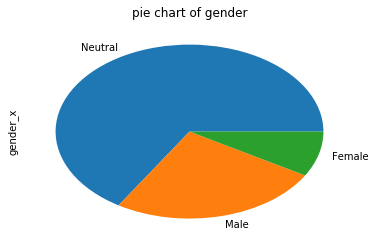

In [1680]:
#Distribution of the data based on gender
twitter_master[twitter_master['gender_x'].notnull()]['gender_x'].value_counts().plot(kind='pie')
plt.title('pie chart of gender')

We can see how the dataset is divided into male and female dogs. We see that male dogs the dataset when compared to the number of females. More than 50% of the dogs examined have an unknown gender. So this does not provide an accurate analysis of the gender distribution.

In [1681]:
#New dataset after groupby
top=twitter_master.groupby('hashtag').mean()

In [1682]:
#reset index
top=top.reset_index()

C:\Users\prane\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'count')

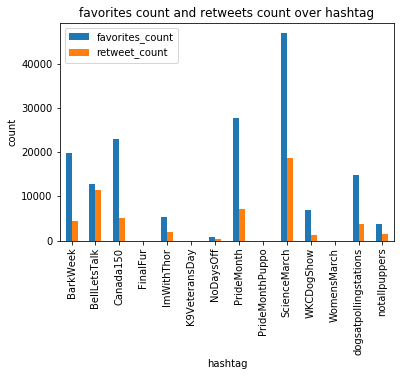

In [1683]:
#Bar chart of favorites count and retweet count over hashtag
top.plot(x='hashtag', y=['favorites_count','retweet_count'], kind='bar',style='.')
plt.title('favorites count and retweets count over hashtag')
plt.xlabel('hashtag')
plt.ylabel('count')

We can see how the retweet count and favorites count vary over the trends generated by we rate dogs. We see that science march has seen the highest popularity and retweets. While womens march, k9veteransday,PrideMonthPuppo and final fur all see relatively small number of favorites and retweets. The person incharge of generating these trends should look at replacing the 4 lowest trending hashtags.

Text(0,0.5,'Count')

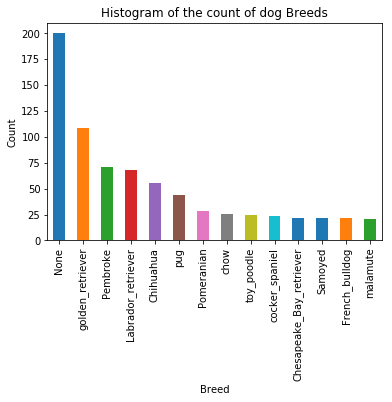

In [1684]:
#Histogram of count of dog breeds obtained after groupby
top_breeds=twitter_master.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the count of dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')

The histogram of the count of dog breeds are shown above. We can see that the golden retriever is the most common dog breed tweeted and the malamute is the least common dog breed tweeted. We can also see that the dog breed is not available for close to 200 tweets. Having the dog breed will help in better understanding of the user preference in dogs.

In [1685]:
#groupby breeds
top_b = top_breeds.groupby('breed').mean()

Text(0,0.5,'rating')

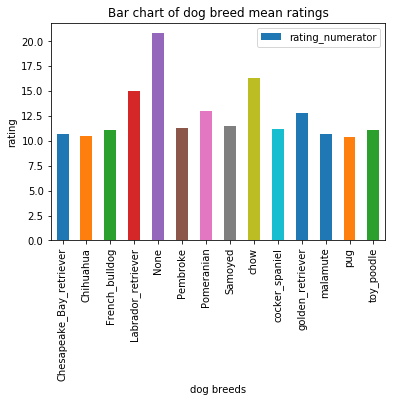

In [1686]:
# mean ratings over dog breeds
top_b.plot(y='rating_numerator', kind='bar')
plt.title('Bar chart of dog breed mean ratings')
plt.xlabel('dog breeds')
plt.ylabel('rating')

We can see the mean ratings of the dog breeds above. We can see that the chow has the highest mean rating. We also see that 9 dog breeds have close to the same mean rating. This should mean that there is no bias based on dog breeds

Text(0,0.5,'favorite count')

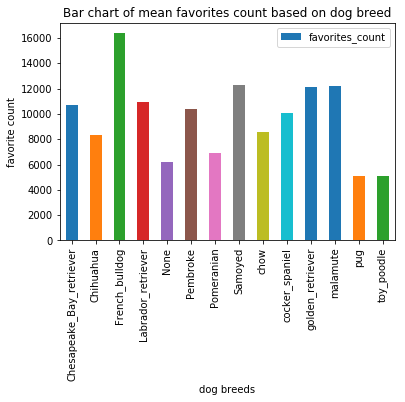

In [1687]:
# mean ratings over dog breeds
top_b.plot(y='favorites_count', kind='bar')
plt.title('Bar chart of mean favorites count based on dog breed')
plt.xlabel('dog breeds')
plt.ylabel('favorite count')

From the chart above, we see that french bulldogs have the highest mean favorite count. We can also see that the pug has the lowest mean favorite count. On comparing this chart with the tweet count for dog breeds. We see that pug has slightly higher tweets than 6 other dog breeds, it is suprising that the pug still continues to have the lowest favorite count.

In [1688]:
#understanding ratings over dog breeds
top_breeds.groupby('breed')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Chesapeake_Bay_retriever,22.0,10.681818,1.554911,8.0,10.00,10.00,12.00,13.0
Chihuahua,55.0,10.509091,2.176241,3.0,10.00,11.00,12.00,14.0
French_bulldog,22.0,11.136364,1.726418,8.0,10.00,12.00,12.00,14.0
Labrador_retriever,68.0,15.058824,21.066974,7.0,10.00,11.50,12.00,165.0
None,200.0,20.810000,128.838038,1.0,7.00,10.00,11.00,1776.0
Pembroke,71.0,11.267606,1.851314,4.0,11.00,12.00,12.00,14.0
Pomeranian,28.0,13.035714,12.206501,6.0,10.00,11.00,11.25,75.0
Samoyed,22.0,11.511818,1.468795,7.0,11.00,11.63,13.00,13.0
chow,26.0,16.307692,26.077990,7.0,10.25,11.00,12.00,144.0


On looking at the table above, we see that ratings for 25th, 50th and 75th percentile are relatively close. This means that despite a few max ratings being higher than others. We see that the rating system is consistent.

In [1689]:
#understanding favorites count data over dog type
twitter_master.groupby('dog_type')['favorites_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
None,1153.0,8108.485690,11517.156953,51.0,1495.00,3599.0,10163.00,122441.0
doggo,55.0,13411.054545,15492.775010,739.0,6223.50,8593.0,12480.00,93308.0
floofer,18.0,7188.500000,6715.325223,1370.0,3792.25,4835.5,9052.75,30421.0
pupper,172.0,6407.656977,7888.437527,260.0,2224.50,3200.5,7125.25,50383.0
puppo,21.0,14775.333333,12929.786716,1561.0,6841.00,9868.0,19575.00,55971.0


We see in the table above the distribution of favorites_count based on dog type. We see a high variation between minimum and the maximum. It will be an interesting analysis to see how the maximum value of 122441 compares with the maximum favorites received in the twitterverse. We see that puppo has the highest mean so we can assume that puppo receives more favorites than other dog breeds.

In [1690]:
#Understanding retweet count over dog type
twitter_master.groupby('dog_type')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
None,1153.0,2482.470945,4078.074774,2.0,503.00,1173.0,2874.00,60735.0
doggo,55.0,4570.618182,6774.321662,35.0,1893.00,2479.0,3960.50,40837.0
floofer,18.0,2302.000000,1808.190646,371.0,1150.50,1626.5,2851.25,6468.0
pupper,172.0,2103.075581,2588.806860,25.0,663.75,1208.0,2312.50,17134.0
puppo,21.0,4104.285714,4442.735848,173.0,1431.00,2921.0,4710.00,19076.0


We see in the table above the distribution of retweets based on dog type. We see that doggo has the highest mean retweets, this could mean that tweets with doggos are shared higher than other dog type. Having data on dog type will be beneficial in understanding more about user preferences in the twitterverse.

In [1691]:
#Understanding ratings over dog type
twitter_master.groupby('dog_type')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
None,1763.0,13.156143,52.412302,0.0,10.0,11.0,12.0,1776.0
doggo,95.0,13.747368,19.791449,5.0,11.0,12.0,13.0,204.0
floofer,37.0,13.621622,11.914863,10.0,11.0,12.0,12.0,84.0
pupper,249.0,13.457831,16.538543,3.0,10.0,11.0,12.0,144.0
puppo,31.0,12.032258,1.224306,9.0,11.5,12.0,13.0,14.0


We can see above the distribution of the ratings based on dog types. The ratings are fairly close across the 25th, 50th and 75th percentile. We see that doggo has the highest mean dog rating and puppo has the lowest mean dog rating.